In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# predicting heart disease using machine learning

This notebook looks into using various pythhon-based machine learning and data-science
libraries is an attempt to build a machine learning model capable of predicting whether or
not someone has heart disease based on their medical attributes.

we're going to take the following approach:
1. problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease?

## 2. Data

The original data came from the cleavland data from the UCI machine learning repository --> https://archive.ics.uci.edu/dataset/45/heart+disease

There is lso a version of it available on kaggle --> https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**creates data dictionary**

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.
The following are the features:
1. age
2. sex
3. cp - chest pain
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal
14. target

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation. 0=no) (= the predicted attribute) 0=no) (= the predicted attribute)ok at them later without coming back her.


### Import all the tools we need

In [3]:
#Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be appear inside the notebook
%matplotlib inline 

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

## Load Data

In [4]:
df = pd.read_csv("heart_disease.csv")
df.shape # (rows , columns)

(303, 14)

## data exploration (exploratory data analysis or EDA)

The goal here is to find out the more about data and become a subject matter expert on the dataset you're working with

1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliners and why should you care about them?
5. How can you add , change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# let's find out how many of each class there
df.target.value_counts() # (1->yes , 0->no)

target
1    165
0    138
Name: count, dtype: int64

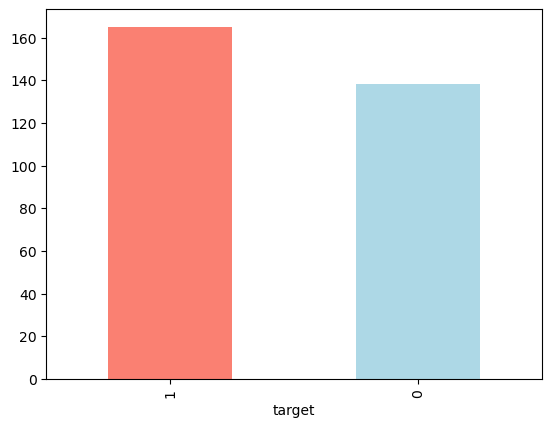

In [8]:
# let's visualize itt
df.target.value_counts().plot(kind = "bar" , color=("salmon" , "lightblue"));

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# let's find out is there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [12]:
df.sex.value_counts() # (1->male , 0->female)

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

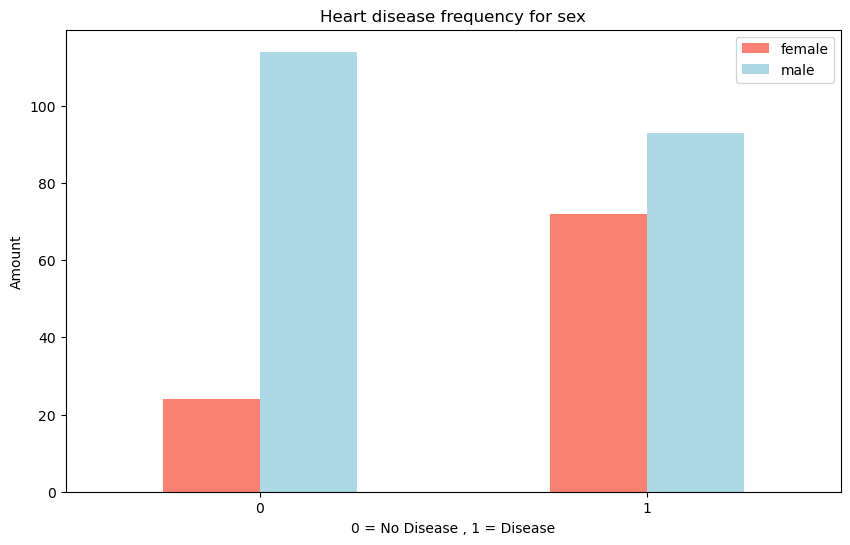

In [14]:
# create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon" , "lightblue"]);

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["female" , "male"]); # legend jo colour h usko female aur male se denote kr dega
plt.xticks(rotation=0) # x axis ke 0 aur 1 ko seedha kar dega

### Age vs Max heart rate for heart disease

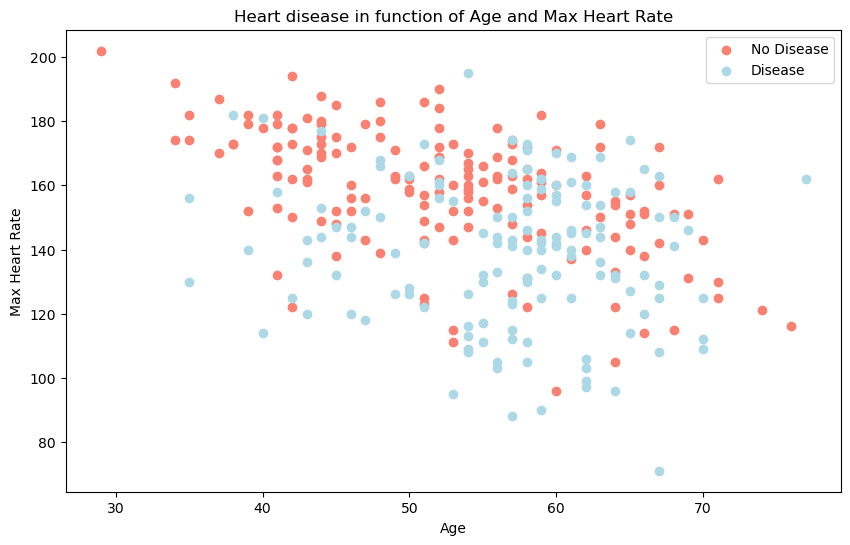

In [15]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon");

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Add some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease" , "Disease"]);

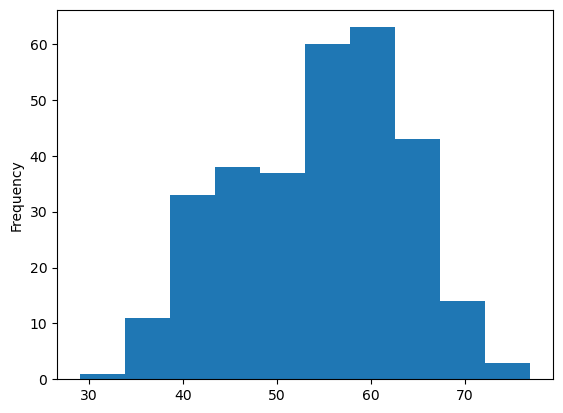

In [16]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease frequency per chest pain type

cp - chest pain type:

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophgael spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


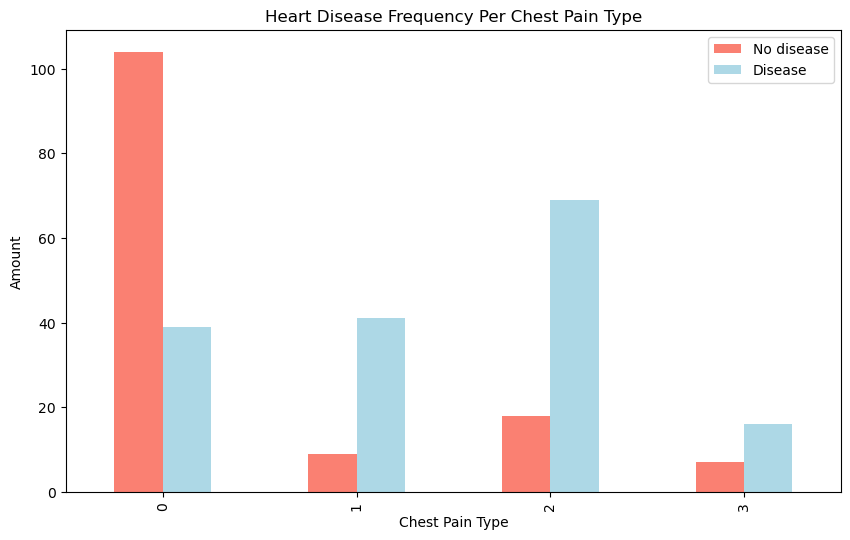

In [18]:
# make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon" , "lightblue"]);

# add some important information
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease" , "Disease"]);

In [19]:
# Make a correlation matrix
df.corr() #corr --> correaltion

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


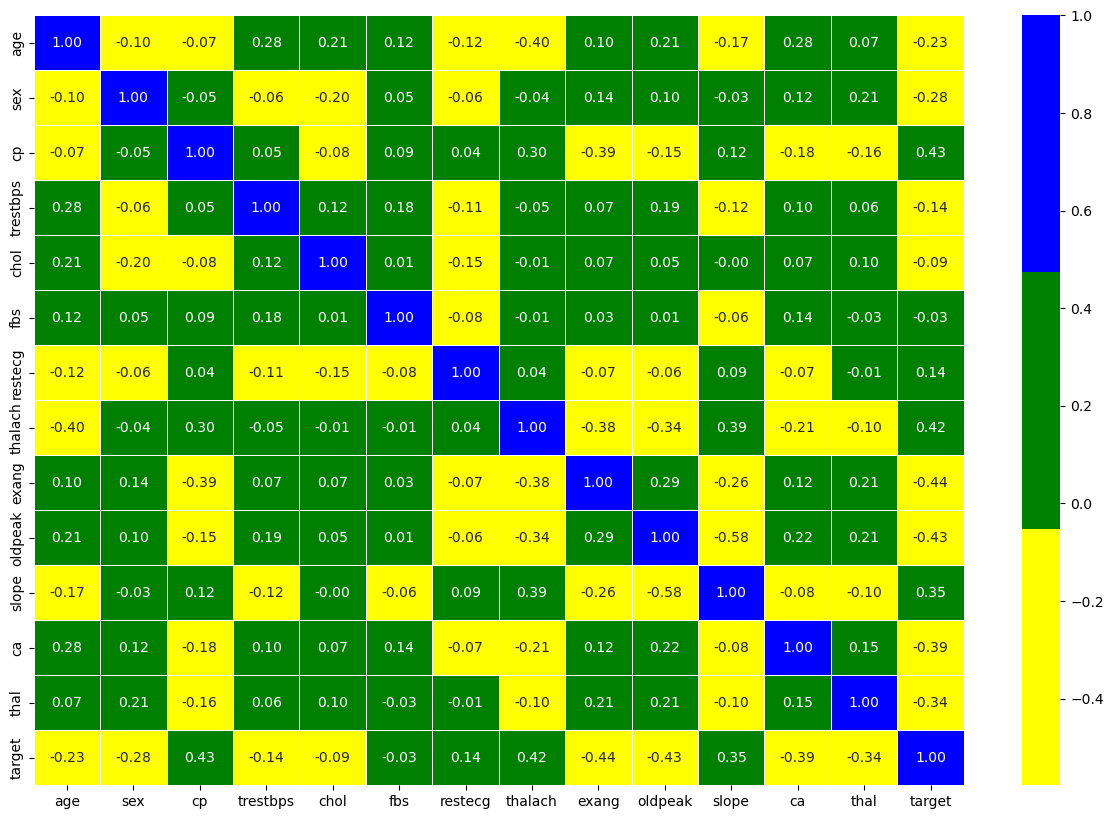

In [20]:
# let's make our correaltioon matrix a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f", #format
                cmap=["yellow","green","blue"]); # colorMap

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease)

## Enough EDA , Let's Model
Remember, we do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using sex, the rest of the data seems to be pretty distributed.

So what we'll do next is model driven EDA, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

* Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
* You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
  
* We want to quickly find:
1. Distributions (df.column.hist())
2. Missing values (df.info())
3. Outliers

Let's build some models.

## 5. Modellng

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Everything except target variable
x = df.drop("target" , axis=1)

# target variable
y = df["target"]

Let's see our new variables.

In [23]:
# Independent variables (no target column)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
# Targets
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Training and test split

Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and test set. You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

In [25]:
np.random.seed(42)

# split into train and test set
x_train , x_test , y_train , y_test = train_test_split(x,
                                                      y,
                                                      test_size=0.2)  # percentage of data to use for test set (20%)

The test_size parameter is used to tell the train_test_split() function how much of our data we want in the test set.

A rule thumb is to use 80% of your data to train on and the other 20% to test on.

For our problem, a train and test set are enough. But for other problems, you could also use validation(train/validation/test) set or ross-validation (we'll see this in a second).

But again, each problem will differ. The post, How(and why) to create a good validation set by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [26]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [27]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

we'll train it (find the patterns) on the training set

and we'll test it (use the patterns) on the test set

### Model choices
Now we've got our data prepared, we can start to fit models. we'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighnoursClassifier()
3. RandomForest - RandomForestClassifier()
#### Why these?
If we look at the Scikit-Learn algorithm cheat sheet, we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more)

In [28]:
# put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models , x_train , x_test , y_train , y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
     # Random seed for reproducible results
    np.random.seed(42)
    # Make an empty dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name , model in models.items():
        # fit the model to the data
        model.fit(x_train , y_train)
         # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\users\rajat\data-science\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Beautiful! Since our models are fitting, let's compare them visually.

## Model comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

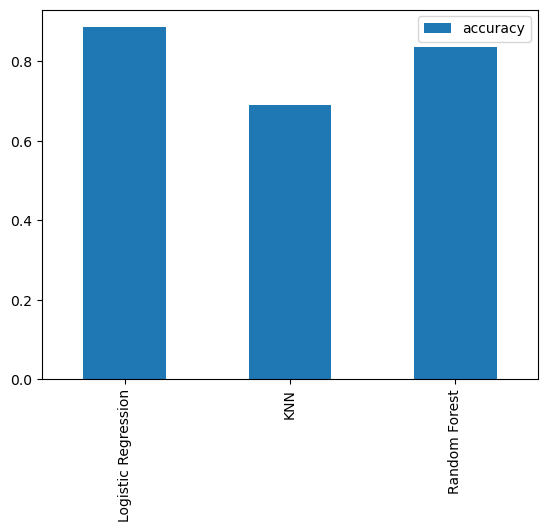

In [30]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot(kind="bar");

Beautiful! We can't really see it from the graph but looking at the dictionary, the LogisticRegression() model performs best.

Since you've found the best model. Let's take it to the boss and show her what we've found.

**You**: I've found it!

**Her**: Nice one! What did you find?

**You**: The best algorithm for predicting heart disease is a LogisticRegression!

**Her**: Excellent. I'm supriced the hyperparameter tuning is finished by now

**You**: wonders what hyperparameter tuning is

**You**: Ummm yeah, me too, it went pretty quick.

**Her**: I'm very proud, how about you put together a classification report to show the team, and be sure to include a confusion matrix, and the cross-validated precission, recall and F1 scores. I'd also be curious to see what features are most important. Oh and don't forget to include a ** ROC curve.

**You**: ask self, "what are those?"

**You**: Of course! I'll have to you by tomorrow.

Alright, there were a few words in there which could sound made up to someone who's not a budding data scientist like yourself. But being the budding data scientist you are, you know data scientists make up words all the time.

Let's briefly go through each before we see them in action.

**Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

**Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).

**Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.

**Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.

**Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.

**F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.

**Classification report** - Sklearn has a build-in function called classification_report() which returns some of the main classification metrics such as precission, recal and f1-score.

**ROC Curve** - Receiver Operating Characteristic is a plot of true positive rate versus false positive rate.

**Area Under Curve(AUC)** - the area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it overfits (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a validation set but since we don't have much data, we'll use cross-validation.

The most common type of cross-validation is k-fold. It involves splitting your data into k-fold's and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

Normal train and test split versus 5-fold cross-validation

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precission, recall, F1-score and ROC at the same time.

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precission, recall and F1-scores metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (n_neigbors=5).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of n_neighbors.



In [31]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)  # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i)  # set neighbors value

    # Fit the algorithm
    knn.fit(x_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

These are hard to understand, let's plot them.

Maximum KNN score on the test data: 75.41%


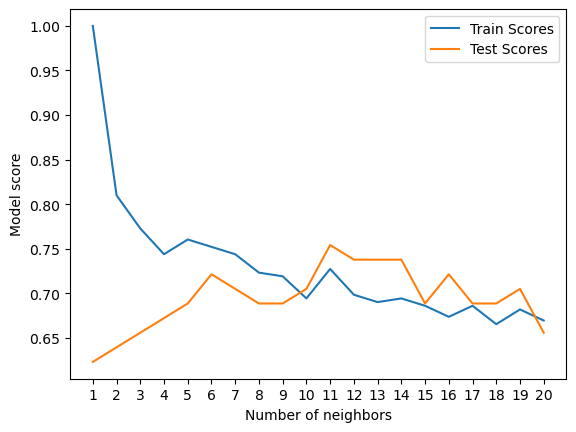

In [34]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 11 seems best.

Even knowing this, the KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

## Tuning models with with RandomizedSearchCV

Reading the Scikit-Learn documentation for LogisticRegression, we find there's a number of different hyperparameters we can tune.

The same for RandomForestClassifier.

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()
  
using RandomizedSearchCV

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [35]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4 , 4 , 20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50), # array bna dega jisme 10 se 1000 ke bich me numbers honge 50 ke gap me
          "max_depth" : [None , 3 , 5 , 10],
          "min_samples_split" : np.arange(2 , 20 , 2),
          "min_samples_leaf" : np.arange(1 , 20 , 2)}

Now let's use RandomizedSearchCV to try and tune our LogesticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [36]:
# Tune LogisticRegression

# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier

In [39]:
# Tune RandomForestClassifier

# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rfc.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rfc.score(x_test, y_test)

0.8688524590163934

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier and LogisticRegression.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since LogisticRegression is pulling out in front, we'll try tuning it further with GridSearchCV.

## Tuning a model with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_itercombinations, GridSearchCV will test every single possible combination.

In short:

* RandomizedSearchCV - tries n_itercombinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.
  
Let's see it in action.

In [42]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4 , 4 , 30),
               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [43]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

n this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

**Note**: If there are a large amount of hyperparameters combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating our tuned machine learning classifier, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

we want:
* ROC curve and AUC score - roc_curve()
* confusion matrix - confusion_matrix()
* classification report - classification_report()
* precision - precision_score
* recall - recall_score()
* f1 score - f1_score()

score().
Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling predict() on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [45]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [46]:
# let's see that
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

They look like our original test data labels, except different where the model has predicted wrong.

In [47]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

## ROC Curve and AUC Scores
What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

To get an appropiate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negeative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function plot_roc_curvewhich can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the plot_roc_curve function we can see it takes (estimator, X, y)as inputs. Where estimatoris a fitted machine learning model and X and y are the data you'd like to test on.

In our case, we'll use the GridSearchCV version of our LogesticRegression estimator, gs_log-reg as well as the test data, X_test and y_test.

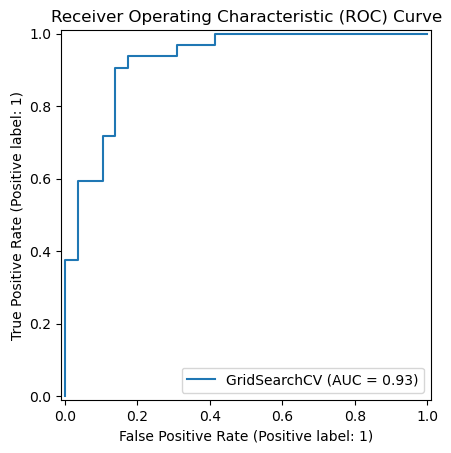

In [48]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show();

This is great, our model does far better then guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0. So there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

## confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [49]:
# confusion matrix
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


As you can see, Scikit-Learn's build-in confusion matrix is a bit bland. For a presentation you'd proberbly want to make it visual.

Let's create a function which uses Seaborn's heatmap() for doing so.

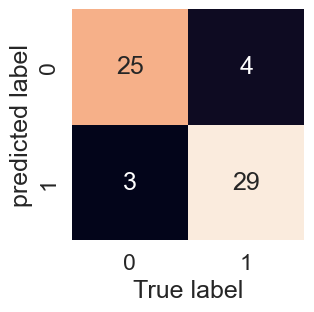

In [50]:
sns.set(font_scale = 1.5)

def plot_confusion_matrix(y_test , y_preds):
    """
    plots a nice looking confusion matrix using seaborns's heatmap()
    """
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot=True,
                    cbar=False) # color-bar
    plt.xlabel("True label")
    plt.ylabel("predicted label")

plot_confusion_matrix(y_test , y_preds)

Beautiful! That looks much better.

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive)

## Classification report
We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [51]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



What's going on here?

Let's get a refresh.

* Precision - Indicates the proportion of positive Identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. a perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).
  
Ok, now we've got a few deeper insights on our model. But these where all calculated using a single training and test set.

What we'll do to make them more solid is calculate them usingg cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score()works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

### calculate evaluation metrics using cross-validation

we're going to calculate precision , recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [52]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
# create a new classifier with new parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [54]:
# Cross-validates accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

Since there are 5 metrics here, we'll take the average.

In [55]:
# let's find mean of it
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

Now we'll do the same for other classification metrics.

In [56]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [57]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                           x,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [58]:
# Cross_validated F1-score
cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

Okay, we've got cross validated metrics, now what?

Let's visualize them.

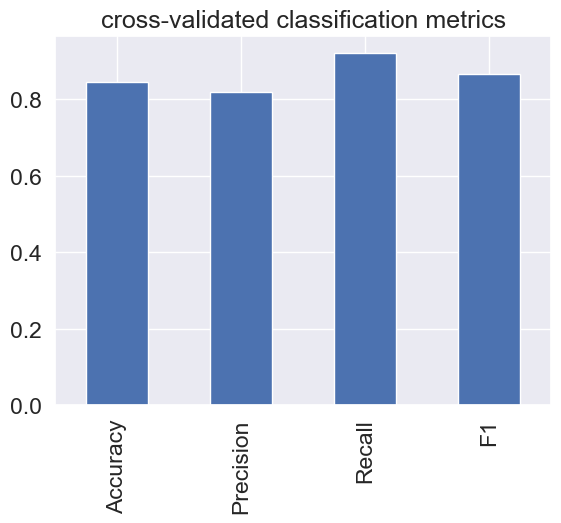

In [59]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = "cross-validated classification metrics",
                     legend = False);

Great! This looks like something we could share. An extension might be adding the metrics on top of each bar so someone can quickly tell they were.

What now?

The final thing of the list of our model evaluation techniques is feature importance.

## Feature importance
Feature importance is another way of asking, "Which features contributing most of the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characteristics, which characteristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_attribute after we've fit an instance of LogisticRegression.

In [60]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(x_train, y_train);

In [61]:
# Check coef_ (coefficient)
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this coef_ array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [64]:
# Match coef_'s of features to columns
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

Now we've match the feature coefficient to different features, let's visualize them.

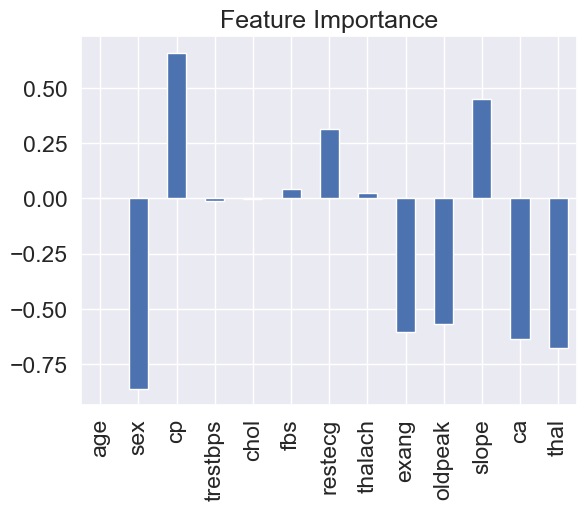

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [66]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [67]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
  
According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can you do with this information?

This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

1. **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## 6. Experimentation
Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

**What next?**

You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

**No.**

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data?
* Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.
* Could you improve the current models (beyond what we've done so far)?
* If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistance)
The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.